In [3]:
import rootutils
import os
from biopandas.pdb import PandasPdb
from omegaconf import DictConfig, open_dict

rootutils.setup_root(os.getcwd(), indicator=".project-root", pythonpath=True)

from cogligandbench.utils.data_utils import (
    extract_protein_and_ligands_with_prody,
    parse_inference_inputs_from_dir,
)

In [21]:
data_dir = "data/plinder_set_0/"
pred_protein = "/home/aoxu/projects/PoseBench/forks/boltz/inference/plinder_set_0/boltz_results_1afb__1__1.A__1.D_1.F/predictions/1afb__1__1.A__1.D_1.F/1afb__1__1.A__1.D_1.F_model_0.pdb"
ref_protein_path = "/home/aoxu/projects/PoseBench/data/plinder_set/1afb__1__1.A__1.D_1.F/1afb__1__1.A__1.D_1.F_protein.pdb"
ref_ligand_path = "/home/aoxu/projects/PoseBench/data/plinder_set/1afb__1__1.A__1.D_1.F/1afb__1__1.A__1.D_1.F_ligand.sdf"

@> 1207 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-19 15:22:38,353] {logger.py:135} DEBUG - 1207 atoms and 1 coordinate set(s) were parsed in 0.00s.
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/util/http_requests.py:65: UserWarning: Too many failures on requests. Exiting...
  warnings.warn("Too many failures on requests. Exiting...")
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pypdb/pypdb.py:476: UserWarning: Retrieval failed, returning None
  warnings.warn("Retrieval failed, returning None")


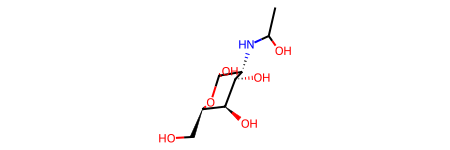

In [9]:
tmp_dir = "/tmp"
extract_protein_and_ligands_with_prody(
    input_pdb_file=pred_protein,
    protein_output_pdb_file=os.path.join(tmp_dir, "pred_protein.pdb"),
    ligands_output_sdf_file=os.path.join(tmp_dir, "pred_ligands.sdf"),
)

In [11]:
from cogligandbench.analysis.complex_alignment import (
    save_aligned_complex,
)

In [22]:
assert os.path.exists(ref_ligand_path)
assert os.path.exists(ref_protein_path)

In [24]:
save_aligned_complex(
    predicted_protein_pdb=os.path.join(tmp_dir, "pred_protein.pdb"),
    predicted_ligand_sdf=os.path.join(tmp_dir, "pred_ligands.sdf"),
    reference_protein_pdb=ref_protein_path,
    reference_ligand_sdf=ref_ligand_path,
)


In [25]:
from posebusters.posebusters import PoseBusters
pb = PoseBusters(config="redock", top_n=None)
pb.bust(
        mol_pred="/tmp/pred_ligands_aligned.sdf",
        mol_true=ref_ligand_path,
        mol_cond=ref_protein_path,
        full_report=True
) 

/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1642: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1642: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])
/home/aoxu/miniconda3/envs/PoseBench/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1642: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs f

,,mol_pred_loaded,mol_true_loaded,mol_cond_loaded,sanitization,all_atoms_connected,molecular_formula,molecular_bonds,double_bond_stereochemistry,tetrahedral_chirality,bond_lengths,...,most_extreme_sum_radii_scaled_waters,most_extreme_relative_distance_waters,most_extreme_clash_waters,volume_overlap_protein,volume_overlap_organic_cofactors,volume_overlap_inorganic_cofactors,volume_overlap_waters,rmsd,kabsch_rmsd,centroid_distance
file,molecule,,,,,,,,,,,,,,,,,,,,,
/tmp/pred_ligands_aligned.sdf,mol_at_pos_0,True,True,True,True,True,False,True,True,False,True,...,3.25,1.262752,False,0.028556,NaN,NaN,NaN,NaN,NaN,0.383036


In [34]:
import numpy as np
from prody import parsePDB
from rdkit import Chem
from rdkit.Chem import AllChem

# Protein CA‐only RMSD (Method 1)
pred_coords = parsePDB(f"{tmp_dir}/pred_protein.pdb") \
    .select("name CA").getCoords()
ref_coords = parsePDB(ref_protein_path) \
    .select("name CA").getCoords()
rmsd_protein = np.sqrt(np.mean(np.sum((pred_coords - ref_coords)**2, axis=1)))

# Alternative method for Protein CA‐only RMSD (Method 2)
# This computes the RMSD as the square root of the sum of squared differences divided by the number of atoms.
rmsd_protein_alt = np.sqrt(np.sum((pred_coords - ref_coords)**2) / pred_coords.shape[0])

# Ligand RMSD (Method 1)
sup_pred = Chem.SDMolSupplier(f"{tmp_dir}/pred_ligands_aligned.sdf", removeHs=False)
sup_ref  = Chem.SDMolSupplier(ref_ligand_path,                removeHs=False)

# drop any None entries
pred_lig = next(m for m in sup_pred if m is not None)
ref_lig  = next(m for m in sup_ref  if m is not None)

for mol in (pred_lig, ref_lig):
    if mol.GetNumConformers() == 0:
        AllChem.EmbedMolecule(mol)

try:
    rmsd_ligand = AllChem.GetBestRMS(pred_lig, ref_lig)
    ligand_msg = f"{rmsd_ligand:.3f} Å"
except Exception:
    ligand_msg = "could not be computed (no match)"

# Alternative method for Ligand RMSD (Method 2)
# Here, we directly compute the RMSD between the 3D coordinates of the conformers.
try:
    pred_conf = pred_lig.GetConformer()
    ref_conf = ref_lig.GetConformer()
    pred_lig_coords = np.array(pred_conf.GetPositions())
    ref_lig_coords  = np.array(ref_conf.GetPositions())
    rmsd_ligand_alt = np.sqrt(np.mean(np.sum((pred_lig_coords - ref_lig_coords)**2, axis=1)))
    ligand_msg_alt = f"{rmsd_ligand_alt:.3f} Å"
except Exception:
    ligand_msg_alt = "could not be computed (no match)"

print(f"Protein RMSD (CA) Method 1: {rmsd_protein:.3f} Å")
print(f"Protein RMSD (CA) Method 2: {rmsd_protein_alt:.3f} Å")
print(f"Ligand RMSD Method 1: {ligand_msg}")
print(f"Ligand RMSD Method 2: {ligand_msg_alt}")

@> 1192 atoms and 1 coordinate set(s) were parsed in 0.01s.
[2025-06-19 16:07:38,509] {logger.py:135} DEBUG - 1192 atoms and 1 coordinate set(s) were parsed in 0.01s.
@> 1194 atoms and 1 coordinate set(s) were parsed in 0.00s.
[2025-06-19 16:07:38,514] {logger.py:135} DEBUG - 1194 atoms and 1 coordinate set(s) were parsed in 0.00s.


Protein RMSD (CA) Method 1: 42.607 Å
Protein RMSD (CA) Method 2: 42.607 Å
Ligand RMSD Method 1: could not be computed (no match)
Ligand RMSD Method 2: 3.999 Å


In [36]:
from rdkit.Chem import AllChem

# Method 1: Using AllChem.GetBestRMS
try:
    rmsd_ligand = AllChem.GetBestRMS(pred_lig, ref_lig)
    print("Ligand RMSD (Method 1):", f"{rmsd_ligand:.3f} Å")
except Exception:
    print("Ligand RMSD (Method 1): could not be computed (no match)")

# Method 2: Directly compute RMSD from conformer coordinates
try:
    pred_conf = pred_lig.GetConformer()
    ref_conf = ref_lig.GetConformer()
    pred_coords = np.array(pred_conf.GetPositions())
    ref_coords = np.array(ref_conf.GetPositions())
    rmsd = np.sqrt(np.mean(np.sum((pred_coords - ref_coords)**2, axis=1)))
    print("Ligand RMSD (Method 2):", f"{rmsd:.3f} Å")
except Exception:
    print("Ligand RMSD (Method 2): could not be computed (no match)")


Ligand RMSD (Method 1): could not be computed (no match)
Ligand RMSD (Method 2): 3.999 Å


In [37]:
import MDAnalysis as mda
from MDAnalysis.analysis import rms

# Load the predicted and reference protein structures
u_pred = mda.Universe(f"{tmp_dir}/pred_protein.pdb")
u_ref  = mda.Universe(ref_protein_path)

# Select CA atoms from both structures
sel_pred = u_pred.select_atoms("name CA")
sel_ref  = u_ref.select_atoms("name CA")

# Compute the RMSD between the two selections
rms_obj = rms.RMSD(sel_pred, sel_ref)
rms_obj.run()
print("Protein CA RMSD:", rms_obj.rmsd[-1, -1])


Protein CA RMSD: 7.288222795223699


In [39]:
# Get a list of system inputs using the provided utility.
# It is assumed each system input is a dict with keys:
#   "predicted_protein", "reference_protein", and "reference_ligand"
data_dir = "/home/aoxu/projects/PoseBench/data/plinder_set/"
system_inputs = parse_inference_inputs_from_dir(data_dir)
results = []

for i, inp in enumerate(system_inputs):
    # Create a unique temporary directory for each system
    system_tmp = os.path.join(tmp_dir, f"system_{i}")
    os.makedirs(system_tmp, exist_ok=True)
    
    # Set file paths for this system
    pred_prot_in = inp["predicted_protein"]
    ref_prot = inp["reference_protein"]
    ref_lig = inp["reference_ligand"]
    
    # Define output file paths (unique per system)
    pred_prot_out = os.path.join(system_tmp, "pred_protein.pdb")
    pred_lig_out  = os.path.join(system_tmp, "pred_ligands.sdf")
    
    # Step 1: Extract predicted protein and ligand from the predicted pdb file.
    extract_protein_and_ligands_with_prody(
        input_pdb_file=pred_prot_in,
        protein_output_pdb_file=pred_prot_out,
        ligands_output_sdf_file=pred_lig_out,
    )
    
    # Step 2: Align the predicted ligand to the reference complex.
    # (Assuming save_aligned_complex writes the aligned ligand to a file named "pred_ligands_aligned.sdf"
    # in the same directory as the predicted ligand file)
    save_aligned_complex(
        predicted_protein_pdb=pred_prot_out,
        predicted_ligand_sdf=pred_lig_out,
        reference_protein_pdb=ref_prot,
        reference_ligand_sdf=ref_lig,
    )
    
    # The aligned ligand is then expected at:
    aligned_lig = os.path.join(system_tmp, "pred_ligands_aligned.sdf")
    
    # Step 3: Compute the protein (CA-only) RMSD using prody.
    # (parsePDB is already available from earlier cells)
    prot_pred_sel = parsePDB(pred_prot_out).select("name CA")
    prot_ref_sel  = parsePDB(ref_prot).select("name CA")
    coords_pred = prot_pred_sel.getCoords()
    coords_ref  = prot_ref_sel.getCoords()
    rmsd_prot = np.sqrt(np.mean(np.sum((coords_pred - coords_ref)**2, axis=1)))
    
    # Step 4: Compute the ligand RMSD using RDKit.
    # (Chem and AllChem are available from earlier cells)
    sup_aligned = Chem.SDMolSupplier(aligned_lig, removeHs=False)
    sup_reflig  = Chem.SDMolSupplier(ref_lig, removeHs=False)
    mol_pred = next(m for m in sup_aligned if m is not None)
    mol_ref  = next(m for m in sup_reflig if m is not None)
    try:
        rmsd_lig = AllChem.GetBestRMS(mol_pred, mol_ref)
    except Exception:
        rmsd_lig = None
    
    results.append((i, rmsd_prot, rmsd_lig))
    print(f"System {i}: Protein RMSD = {rmsd_prot:.3f} Å, Ligand RMSD = {rmsd_lig if rmsd_lig is None else f'{rmsd_lig:.3f} Å'}")

TypeError: tuple indices must be integers or slices, not str